In [43]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [44]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

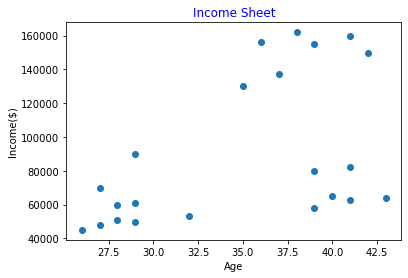

In [45]:
plt.scatter(df.Age,df['Income($)'])
plt.title("Income Sheet", color='blue')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [46]:
km = KMeans(n_clusters =3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [47]:
df['clusters'] =y_predicted
df

,Name,Age,Income($),clusters
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [48]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

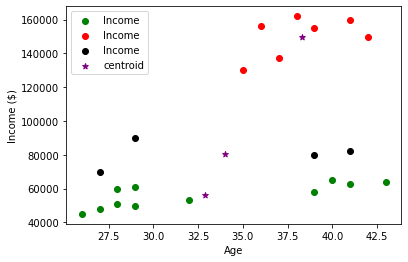

In [50]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

plt.scatter(df1.Age,df1['Income($)'], color = 'green',label='Income')
plt.scatter(df2.Age,df2['Income($)'], color = 'red',label='Income')
plt.scatter(df3.Age,df3['Income($)'], color = 'black',label='Income')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

# Preprocessing using min max scler

In [51]:
scaler = MinMaxScaler()

In [52]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

In [53]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [54]:
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


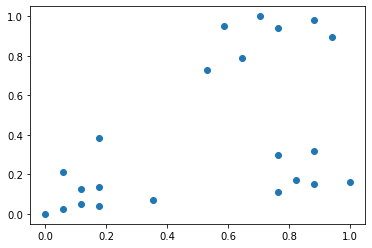

In [55]:
plt.scatter(df.Age,df['Income($)'])

In [56]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [57]:
df['clusters'] =y_predicted
df.head()

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [58]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

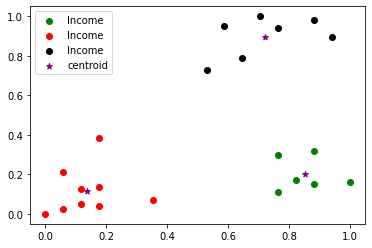

In [60]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

plt.scatter(df1.Age,df1['Income($)'],color='green',label='Income')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='Income')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='Income')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*',label='centroid')
plt.legend()


# Elbow Plot:

In [61]:
sse=[]
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

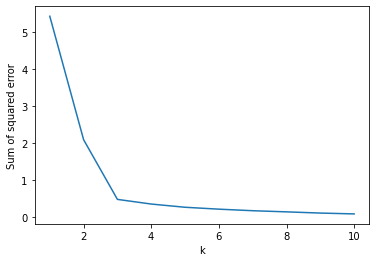

In [62]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [63]:
df.groupby('clusters').mean()

,Age,Income($)
clusters,,
0,0.852941,0.202279
1,0.137255,0.116334
2,0.722689,0.897436
